# I. Perkenalan


Nama : Samuel Kristianto Pardomuan Naiborhu

Batch : FTDS-015

Dataset : US Youtube Videos

Objective : Make model to predict the views of a video

# II. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


import joblib
import json
import warnings
warnings.simplefilter("ignore")

# III. Data Loading

In [2]:
# load data
raw_data = pd.read_csv('USvideos.csv')
pd.set_option('display.max_columns', None)
raw_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
raw_data.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


# IV. Exploratory Data Analysis (EDA)

In [4]:
# Data Decription
raw_data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


The most viewed youtube videos from usa has 225,211,923 views. The median of views is 681861.	

In [5]:
# Videos with most views from USA
raw_data[raw_data['views'] == raw_data['views'].max()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...


Most viewed videos by Americans is a music video titled This is America by childish gambino with 225,211,923 views.

In [6]:
# Videos with most views from USA
raw_data[raw_data['likes'] == raw_data['likes'].max()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


Most liked videos by Americans is a music video titled Fake Love by BTS with 5,613,827 likes.

In [7]:
# Videos with most views from USA
raw_data[raw_data['dislikes'] == raw_data['dislikes'].max()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
11323,QwZT7T-TXT0,18.09.01,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN


Most disliked videos by Americans is an apology video from Logan Paul with 1,674,420 dislikes.

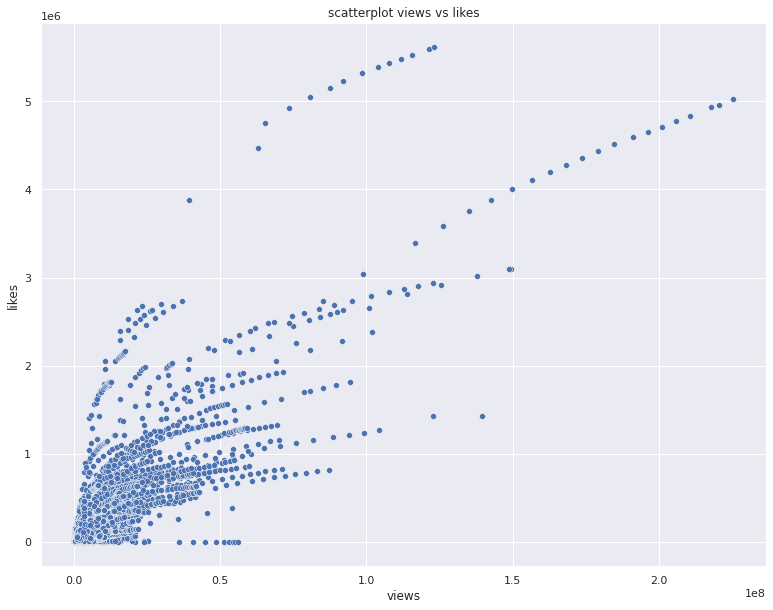

In [8]:
# Create plots

plt.figure(figsize=(13, 10))

# plt.subplot(1,2,1)
sns.scatterplot(x=raw_data['views'],y=raw_data['likes'], palette='hls')
plt.title('scatterplot views vs likes')

plt.show()


Obviously the more views the video has, the higher the chances the video got liked. Higher viewed videos has more likes.

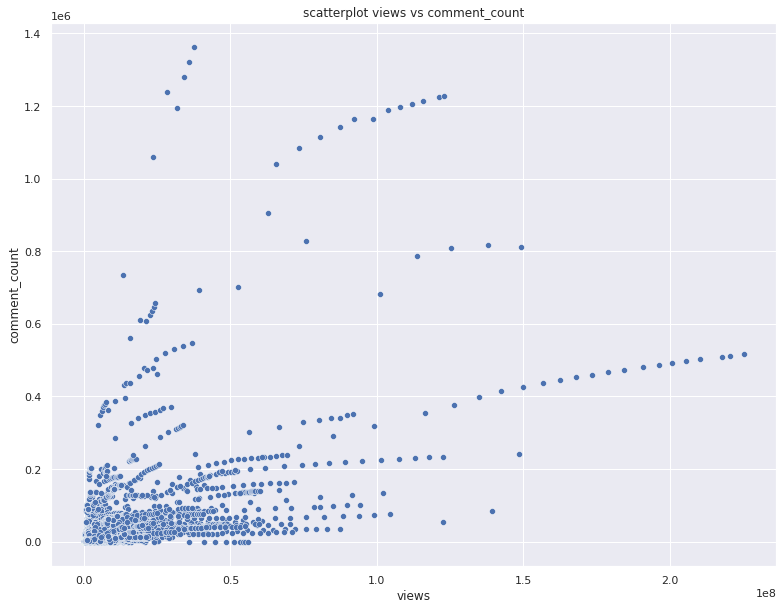

In [9]:
# Create plots

plt.figure(figsize=(13, 10))

# plt.subplot(1,2,1)
sns.scatterplot(x=raw_data['views'],y=raw_data['comment_count'], palette='hls')
plt.title('scatterplot views vs comment_count')

plt.show()


From the chart above the scatterplot is quite diverse, the most commented videos are not one of the most viewed videos. While the most viewed videos are not the most commented videos.

In [10]:
raw_data['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

The most frequent trending category is 24(entertainment), followed by 10(music), and 26(how to video)

In [11]:
raw_data['publish_time']

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40944    2018-05-18T13:00:04.000Z
40945    2018-05-18T01:00:06.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40949, dtype: object

In [12]:
# convert publish_time to datetime hour and put it on new column
raw_data['hour'] = pd.to_datetime(raw_data['publish_time']).dt.hour

In [13]:
raw_data['hour']

0        17
1         7
2        19
3        11
4        18
         ..
40944    13
40945     1
40946    17
40947    17
40948    17
Name: hour, Length: 40949, dtype: int64

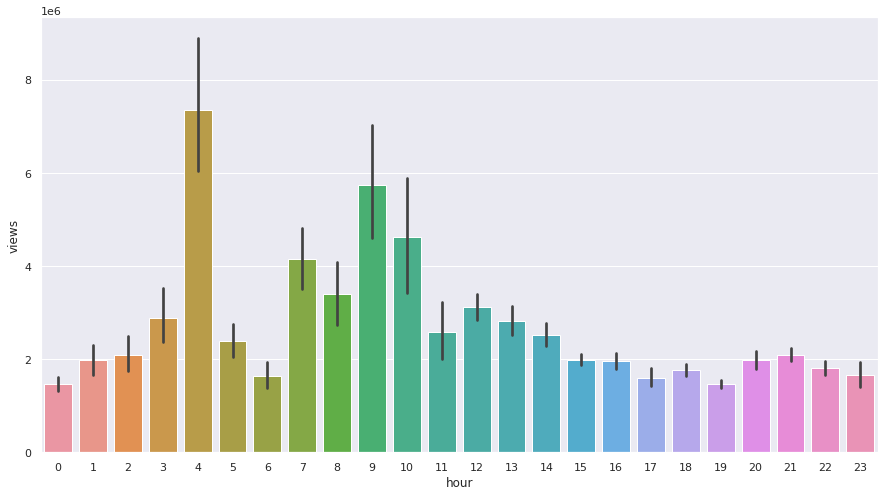

In [14]:
# Create plots

plt.figure(figsize=(15, 8))

# plt.subplot(1,2,1)
sns.barplot(y = raw_data['views'], x=raw_data['hour'])

plt.show()


Hour with the most viewers was published on 4am UTC(12am EST). The least viewers published on 12am UTC(8pm EST)

# V. Data preprocessing

## V.I. define dataframe for inferencing

In [15]:
inf_count =  round(raw_data.shape[0]*0.05)
inf_count

2047

In [16]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
10144,ryr75N0nki0,18.03.01,Eminem - Walk On Water (Official Video) ft. Be...,EminemVEVO,10,2017-12-24T03:30:08.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath""|""Shady""...",16584193,669544,34715,60648,https://i.ytimg.com/vi/ryr75N0nki0/default.jpg,False,False,False,The official video for Eminem's Walk On Water ...,3
40590,L8RxxVYWTIQ,18.13.06,Shootout with Ronaldinho at Nicky Jam World Cu...,Will Smith,24,2018-06-09T01:01:19.000Z,"comedy|""entertainment""|""will smith""|""will""|""sm...",1187544,42554,706,2541,https://i.ytimg.com/vi/L8RxxVYWTIQ/default.jpg,False,False,False,Go behind the scenes of the music video shoot ...,1
30769,NKmGVE85GUU,18.25.04,Why can't you divide by zero? - TED-Ed,TED-Ed,27,2018-04-23T15:00:43.000Z,"TED|""TED-Ed""|""Teded""|""Ted Education""|""TED Ed""|...",775447,28954,674,2303,https://i.ytimg.com/vi/NKmGVE85GUU/default.jpg,False,False,False,Check out our Patreon page: https://www.patreo...,15
7188,stMM0EsoGwY,17.19.12,HOLIDAY GIFT GUIDE 2017 | Jaclyn Hill,Jaclyn Hill,26,2017-12-13T00:28:00.000Z,"jaclynhill1|""jaclyn hill""|""makeup tutorial""|""s...",1017290,56899,2108,7449,https://i.ytimg.com/vi/stMM0EsoGwY/default.jpg,False,False,False,Holiday gift guide 2017!\nGET MY PALETTE HERE!...,0
24584,RyH8TWLribw,18.19.03,The epic late-night Fortnite stream featuring ...,ESPN,17,2018-03-16T19:06:48.000Z,"fortnite|""espn""|""ninja stream with drake""|""juj...",421936,7378,547,970,https://i.ytimg.com/vi/RyH8TWLribw/default.jpg,False,False,False,We trimmed down the epic late-night Fortnite s...,19


In [17]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 40949
new data size: 38902


## V.II. Split train test dataset

In [18]:
# define features variable as X
X = raw_data_1.drop('views', axis=1)

In [19]:
# define target variable as y
y = raw_data_1['views']
y.sample(5)

4225      174569
4184      344534
19838    5706827
12734       4167
27419    2939463
Name: views, dtype: int64

In [20]:
# Slit the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=33)

print(f'Train size: {X_train.shape[0]}')
print(f'Test size: {X_test.shape[0]}')

Train size: 33066
Test size: 5836


## V.III. Handling empty values

In [21]:
# sum null value
X_train.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               472
hour                        0
dtype: int64

Since the one empty is description, it doesn't matter. Becaus we're not going to use it for feature anyway.

## V.IV. Handling Outlier

In [22]:
# make plot for outlier

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [23]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [24]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

### V.IV.I Divide columns

In [25]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['category_id', 'likes', 'dislikes', 'comment_count', 'hour']
Categorical Columns :  ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description']


In [26]:
# remove and add item to columns list
num_columns.remove('category_id')
cat_columns_label = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
encoded_columns = ['category_id']

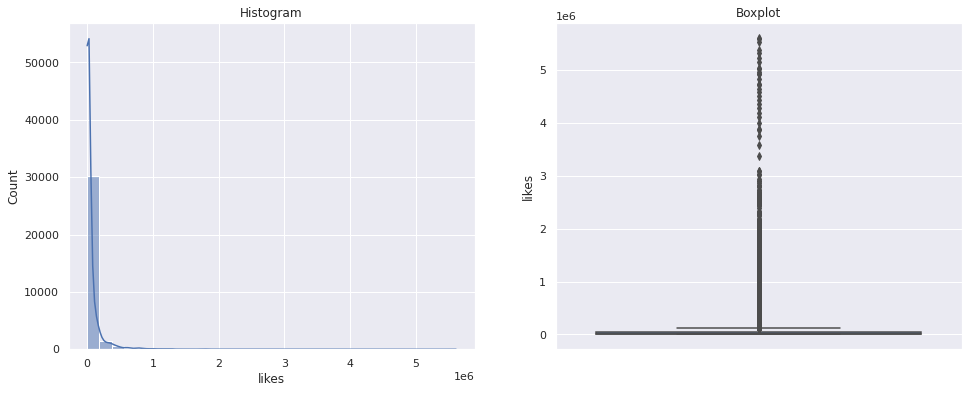

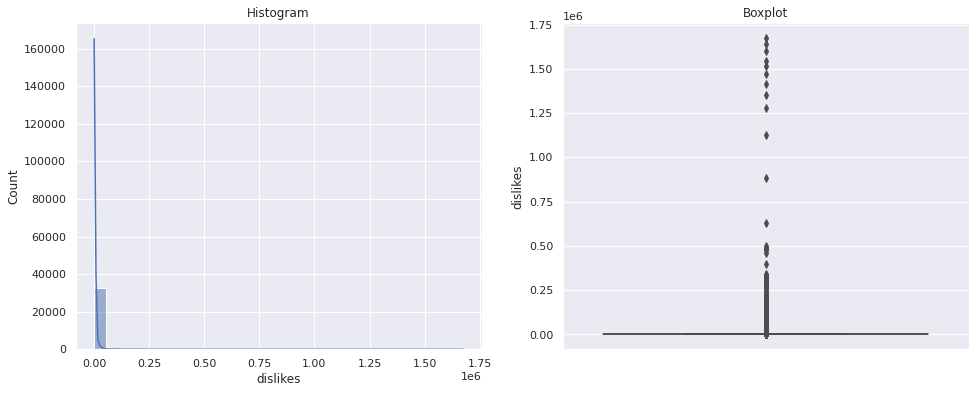

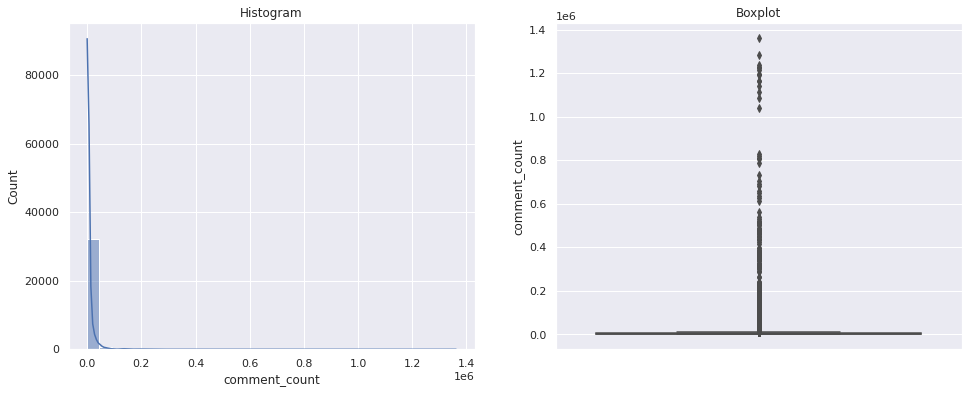

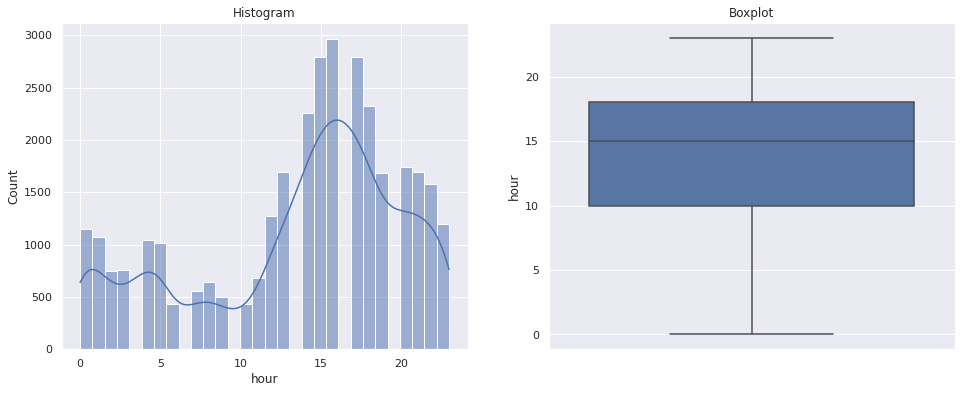

In [27]:
# plotting for numerical columns
for i in num_columns:
  outlier_plot(X_train[i])

In [28]:
# Capping numerical columns
X_train_2 = X_train.copy()
for i in num_columns:
    capping_data(X_train_2, i)

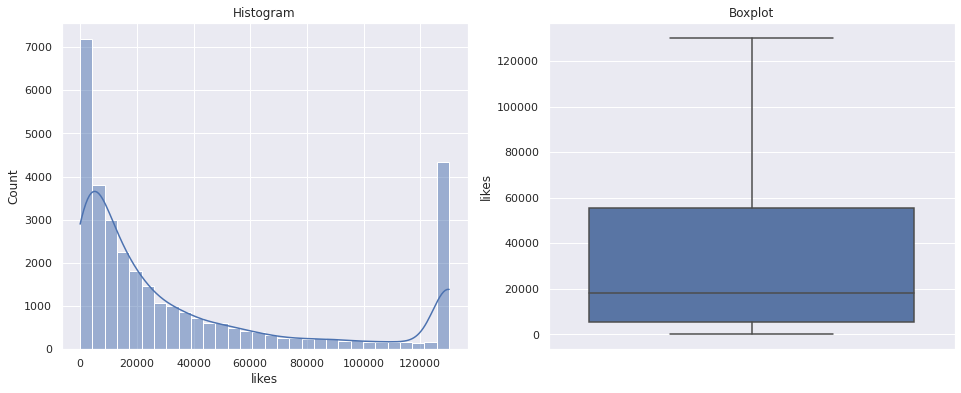

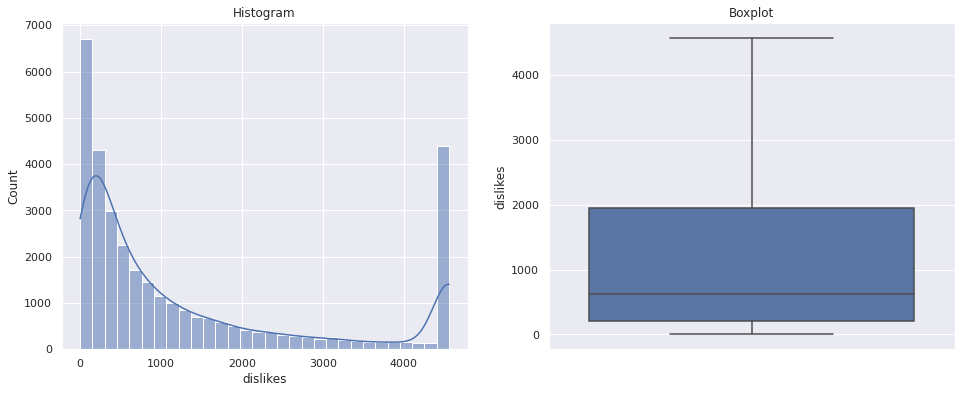

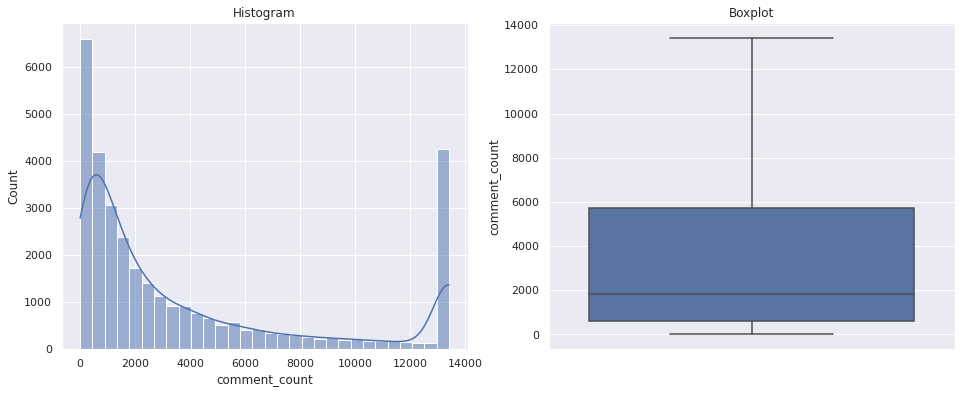

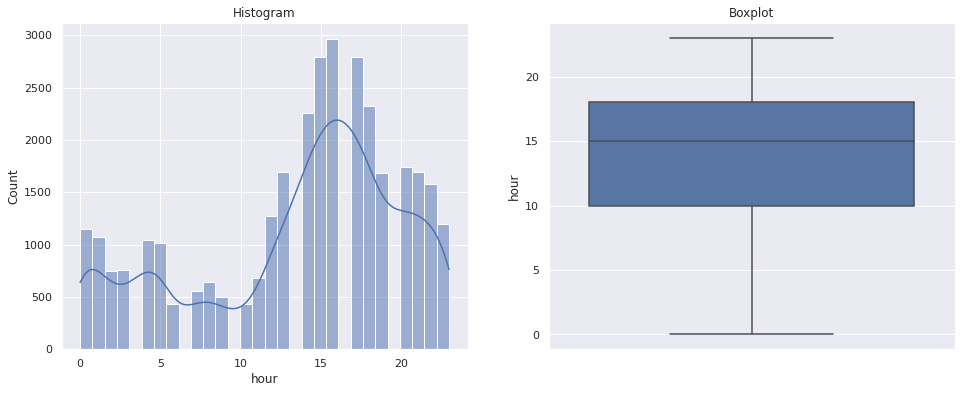

In [29]:
# recheck for outlier_list
for i in num_columns:
  outlier_plot(X_train_2[i])

## V.V Convert dataset

In [30]:
def convert_to_str(x):
    for i in cat_columns_label :
        x[i] = x[i].map({True: 'yes', False: 'no'})
        # print(i)
    return x

In [31]:
# Duplicate dataset, so if something broken, we can start from here instead
X_train_3 = X_train_2.copy()
X_test_1 = X_test.copy()

In [32]:
X_train_3 = convert_to_str(X_train_2)
X_test_2 = convert_to_str(X_test_1)

X_test_2.sample(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
33601,RBbkCEHBw_I,18.09.05,How to make the KELP SHAKE from Spongebob Squa...,Feast Of Fiction,26,2018-05-04T21:00:05.000Z,"spongebob|""patrick star""|""nickelodeon""|""bikini...",11430,694,1832,https://i.ytimg.com/vi/RBbkCEHBw_I/default.jpg,no,no,no,YARRR feasters! Spongebob Squarepants will alw...,21
13618,v3Nv2R9Acec,18.23.01,Quentin Tarantino’s Star Trek (Nerdist Presents),Nerdist,24,2018-01-22T16:00:08.000Z,"Nerdist|""Fvid""|""star trek""|""quentin tarantino""...",3856,87,326,https://i.ytimg.com/vi/v3Nv2R9Acec/default.jpg,no,no,no,Set your phasers to thrill with this Nerdist P...,16


## V.VI Feature Selection

In [33]:
# find corelation between features
X_train_cor = X_train_3.corr() 

In [34]:
# summarize correlation between features
X_train_cor

,category_id,likes,dislikes,comment_count,hour
category_id,1.000000,-0.207012,-0.149354,-0.154374,0.078757
likes,-0.207012,1.000000,0.742752,0.877338,0.042306
dislikes,-0.149354,0.742752,1.000000,0.790914,0.023124
comment_count,-0.154374,0.877338,0.790914,1.000000,0.050117
hour,0.078757,0.042306,0.023124,0.050117,1.000000


# VI. Modelling preprocess

In [35]:
# make new dataframe with merged columns
X_train_4 = X_train_3[num_columns  + cat_columns_label]
X_test_1 = X_test[num_columns + cat_columns_label]

In [42]:
# summarize new dataframe
X_train_4

,likes,dislikes,comment_count,hour,comments_disabled,ratings_disabled,video_error_or_removed
30356,7324.0,559.0,2254.0,4.0,no,no,no
30286,1869.0,65.0,399.0,0.0,no,no,no
31884,64428.0,335.0,3931.0,22.0,no,no,no
23316,1994.0,1594.0,1138.0,1.0,no,no,no
7672,5346.0,174.0,388.0,15.0,no,no,no
...,...,...,...,...,...,...,...
28699,34630.0,1707.0,6146.0,22.0,no,no,no
613,23207.0,4563.5,7030.0,12.0,no,no,no
40653,40889.0,4563.5,4782.0,17.0,no,no,no
2584,344.0,13.0,106.0,17.0,no,no,no


In [37]:
# define Pipeline for encoding and scaling
label_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("encoder", OrdinalEncoder())
])

category_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

In [40]:
# define Preprocess pipeline
preprocessing_pipeline = ColumnTransformer([
    ("label_preprocessor", label_pipeline, cat_columns_label),
    ("passing_through", category_pipeline, encoded_columns),
    ("numerical_preprocessor", numerical_pipeline, num_columns)
])


In [41]:
# prerpocess the dataset using pipeline
preprocessed_features = preprocessing_pipeline.fit_transform(X_train_4)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'no'

## VII.I Modelling using linear regression with pipeline

### VII.I.I Pipelining using linear regression

In [ ]:
# Pipelining using linear regression
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", LinearRegression())
])

### VII.I.II Training the model using pipeline

In [ ]:
complete_pipeline.fit(X_train_4, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('label_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['comments_disabled',
                                                   'ratings_disabled',
                                                   'video_error_or_removed']),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['category_id', 'likes',
                                                   'dislikes', 'comment_count',
                                                   'hour'])])),
                ('estimator', LinearRegression())])

### VII.I.III Model Evaluations

In [ ]:
# Evaluate scores for the training set
score = complete_pipeline.score(X_train_4, y_train)
score

0.23023671608981322

In [ ]:
# Evaluate scores for the test set
complete_pipeline.score(X_test_2, y_test)

-26.64177410314401

## VII.II Pipelining using DecisionTreeRegressor

### VII.II.I Define the model using pipeline

In [ ]:
# Pipelining using DecisionTreeRegressor
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", DecisionTreeRegressor())
])

### VII.II.II Training the model

In [ ]:
complete_pipeline.fit(X_train_4, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('label_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['comments_disabled',
                                                   'ratings_disabled',
                                                   'video_error_or_removed']),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['category_id', 'likes',
                                                   'dislikes', 'comment_count',
                                                   'hour'])])),
                ('estimator', DecisionTreeRegressor())])

### VII.II.III Evaluate the model

In [ ]:
# Evaluate scores for the training set
score = complete_pipeline.score(X_train_4, y_train)
score

0.5648616788315455

In [ ]:
# Evaluate scores for the test set
complete_pipeline.score(X_test_2, y_test)

0.5757674674218409

## VII.III Pipelining using RandomForestRegressor

### VII.III.I Define the model using pipeline

In [ ]:
# Pipelining using RandomForestRegressor
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", RandomForestRegressor())
])

### VII.III.II Training the model

In [ ]:
complete_pipeline.fit(X_train_4, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('label_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['comments_disabled',
                                                   'ratings_disabled',
                                                   'video_error_or_removed']),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['category_id', 'likes',
                                                   'dislikes', 'comment_count',
                                                   'hour'])])),
                ('estimator', RandomForestRegressor())])

### VII.III.II Evaluate the model

In [ ]:
# Evaluate scores for the training set
score = complete_pipeline.score(X_train_4, y_train)
score

0.5636065774689631

In [ ]:
# Evaluate scores for the test set
complete_pipeline.score(X_test_2, y_test)

0.5940445856875709

## VII.IV Pipelining using GradientBoostingRegressor

### VII.IV.I Define the model using pipeline

In [ ]:
# Pipelining using GradientBoostingRegressor
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", GradientBoostingRegressor())
])

### VII.IV.II Training the model

In [ ]:
complete_pipeline.fit(X_train_4, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('label_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['comments_disabled',
                                                   'ratings_disabled',
                                                   'video_error_or_removed']),
                                                 ('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['category_id', 'likes',
                                                   'dislikes', 'comment_count',
                                                   'hour'])])),
                ('estimator', GradientBoostingRegressor())])

### VII.IV.III Evaluate the model

In [ ]:
# Evaluate scores for the training set
score = complete_pipeline.score(X_train_4, y_train)
score

0.46356343044865767

In [ ]:
# Evaluate scores for the test set
complete_pipeline.score(X_test_2, y_test)

0.5009602583672548

## VII.V Model Improvements from the best algorithm(we choose randomforest)

In [ ]:
# Pipelining using RandomForestRegressor
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", RandomForestRegressor())
])

In [ ]:
param = {
    'estimator__max_depth':[18,23,28]
}
grid_search = GridSearchCV(complete_pipeline, param, cv=5)

In [ ]:
# fitting dataset with grid_search
grid_search.fit(X_train_4, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'estimator__max_depth': 18}
Best cross-validation score: 0.54


In [ ]:
param_new=grid_search.best_estimator_

In [ ]:
y_train_pred=param_new.predict(X_train_4)
y_test_pred=param_new.predict(X_test_2)

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train = ', mean_squared_error(y_train, y_train_pred))
print('MSE test = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train = ', r2_score(y_train, y_train_pred))
print('r2score test = ', r2_score(y_test, y_test_pred))

MAE train =  785022.6177820063
MAE test =  826286.6594736952
MSE train =  25418478971917.633
MSE test =  14443576592532.562
RMSE train =  5041674.223104626
RMSE test =  3800470.575143631
r2score train =  0.5633320510112809
r2score test =  0.5895564725548654


### Model Analysis

Rather straight up start modelling, we use pipelining to streamline the process to choose the best model.We found random forest model is the best.

After some tuning, we only get the same results(before tuning: 0.5648616788315455 out of 1.0, after tuning: 0.5637616788315455) maybe because we only tune for 1 hyperparameter. why only 1 because random forest is a bit heavy on computer resources tuning it spends a lot of time.

The result itself is 0.5637616788315455. Which is not bad, not good either..

# VIII. Model Saving

In [ ]:
# save model
with open('random_forest.pkl', 'wb') as file_1:
  joblib.dump(param_new, file_1)

with open('convert_str.pkl', 'wb') as file_2:
  joblib.dump(convert_to_str, file_2)

with open('list_cat.txt', 'w') as file_3:
  json.dump(cat_columns_label, file_3)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

# IX. Model Inference

In [ ]:
# save model
with open('random_forest.pkl', 'rb') as file_1:
  model_random_forest = joblib.load(file_1)

with open('convert_str.pkl', 'rb') as file_2:
  convert_str = joblib.load(file_2)

with open('list_cat.txt', 'r') as file_3:
  model_cat_list = json.load(file_3)

with open('list_num.txt', 'r') as file_4:
  model_num_list = json.load(file_4)

In [ ]:
# display inference-set
data_inf.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
17332,HhGJBBPVpqQ,18.10.02,#DisneyParksLIVE: Super Bowl Celebration | Wal...,Disney Parks,19,2018-02-05T20:34:54.000Z,[none],38824,380,25,32,https://i.ytimg.com/vi/HhGJBBPVpqQ/default.jpg,False,False,False,SUBSCRIBE: http://di.sn/60058Ej7z\n\nAbout Wal...,20
38266,MEcc8e7WwXg,18.01.06,"First kiss, epic carriage ride! | Prince Harry...",BBC,25,2018-05-19T17:09:06.000Z,"harry and meghan weddingq|""Prince Harry""|""prin...",3552427,20240,2589,4231,https://i.ytimg.com/vi/MEcc8e7WwXg/default.jpg,False,False,False,SUBSCRIBE for more BBC highlights: https://bit...,17
4979,chFKDaZns6w,17.08.12,YouTube Creators for Change: Natalie Tran | Wh...,communitychannel,24,2017-12-01T22:11:00.000Z,"communitychannel|""natalie tran""|""community cha...",331575,24324,2678,7014,https://i.ytimg.com/vi/chFKDaZns6w/default.jpg,False,False,False,*regular video soon*\nThis video was made for ...,22


In [ ]:
# divide features
data_inf_1 = data_inf.copy()

In [ ]:
# convert some column to str so we can put it to pipeline later
new_inf = convert_str(data_inf_1)
new_inf.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hour
5832,rRzxEiBLQCA,17.13.12,TWICE Heart Shaker M/V,jypentertainment,10,2017-12-11T08:59:59.000Z,"TWICE Heart Shaker|""TWICE 하트셰이커""|""트와이스 Heart S...",18195959,754791,65326,127305,https://i.ytimg.com/vi/rRzxEiBLQCA/default.jpg,no,no,no,TWICE(트와이스) Heart Shaker M/V\n\nThe 1st Album ...,8
40193,TudhYwBrgYg,18.11.06,Pastry Chef Attempts To Make Gourmet Skittles ...,Bon Appétit,26,2018-06-05T16:03:55.000Z,"candy|""claire saffitz""|""gourmet""|""skittles""|""c...",3812642,91885,2243,7815,https://i.ytimg.com/vi/TudhYwBrgYg/default.jpg,no,no,no,"Claire Saffitz takes on another challenge, thi...",16
20438,08OhPK2BVIU,18.26.02,DOING MAKE UP WITH GARDENING TOOLS!!,Liza Koshy,23,2018-02-21T23:05:10.000Z,"liza|""lizza""|""lizzza""|""lizzzavine""|""lizzzak""|""...",3783687,347314,3918,17071,https://i.ytimg.com/vi/08OhPK2BVIU/default.jpg,no,no,no,"Hoes, and how to use them. Doing my make up wi...",23


In [ ]:
inf_predict = model_random_forest.predict(new_inf)
inf_predict

array([   35252.86029602, 10994624.88      ,    33186.07426056, ...,
         379770.26193593,  1135123.20746357,   173204.58599943])

In [ ]:
new_inf['overal prediction'] = inf_predict

In [ ]:
new_inf[['views', 'overal prediction']]

,views,overal prediction
7562,45855,3.525286e+04
17330,11224337,1.099462e+07
997,67471,3.318607e+04
7121,1522268,1.567562e+06
17015,1380249,1.413861e+06
...,...,...
32043,5587427,5.670702e+06
27498,809520,5.737284e+05
18041,482291,3.797703e+05
361,1137392,1.135123e+06


In [ ]:
print('MAE test = ', mean_absolute_error(new_inf['views'], new_inf['overal prediction']))
print('MSE test = ', mean_squared_error(new_inf['views'], new_inf['overal prediction']))
print('RMSE test = ', np.sqrt(mean_squared_error(new_inf['views'], new_inf['overal prediction'])))
print('r2score test = ', r2_score(new_inf['views'], new_inf['overal prediction']))

MAE test =  745012.9067791927
MSE test =  22088699935652.297
RMSE test =  4699861.693247185
r2score test =  0.5832360557215011


# X. Conclusions

After we have explore the data of American Youtube trending videos we found that the Most viewed videos by Americans is a music video titled This is America by childish gambino with 225,211,923 views. Most liked videos is a music video titled Fake Love by BTS with 5,613,827 likes. Most disliked videos is an apology video from Logan Paul with 1,674,420 dislikes. The median of youtube trending videos view is 681861. Higher viewed videos has more likes. The most commented videos are not one of the most viewed videos. And vice versa the most viewed videos are not the most commented videos either. The most frequent trending category is entertainment, followed by music, "how-to" video, Comedy, and Vlogs.

With the data we have, the model we made have a accuarcy of 56.376%. Which is not bad, not good either..

If we want to have a videos with easiness to capture viewers, we should make a video with category of entertainment, music, how-to, comedy , vlogs, or the combinations of these categories and upload it at 4am UTC(12am EST).